<a href="https://colab.research.google.com/github/JJang-likit/Basic-Study/blob/main/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# matplotlib_라이브러리 이해하기

## matplotlib.pyplot
- matplotlib의 핵심 모듈이다.
- 데이터 시각화를 위한 대부분의 기능을 제공한다.
- figure는 그래프를 그리기 위한 도화지로 이해할 수 있다.
- axes(subplot)은 figure 안에 그리는 그래프를 의미한다.
- 하나의 figure 안에 여러 개의 axes를 그릴 수 있지만 하나의 axes는 여러 개의 figure에 속할 수 없다.
- axes는 2개의 축(x,y)을 가진다.

## matplotlib이 제공하는 주요 기능
- Line Plot(선 그래프) : x축이 연속형 값인 경우 주로 활용된다.(날짜, 년도와 같은 시계열 데이터)
- Bar Plot(막대 그래프) : x축의 값이 주로 범주형 변수인 경우에 활용된다.(성별, 기기유형 등)
- Pie Plot(파이 차트) : 점유율과 같이 y값의 합이 100인 데이터 시각화에 주로 사용된다.
- 히스토그램 : 숫자 데이터를 동일한 폭의 통으로 그룹화하여 자료를 표현하는 방식이다.(연령대별로 분포도를 그리고 싶은 경우)
- scatter(산점도 그래프) : 데이터의 분포를 볼 때 주로 사용된다.
- imshow : 단순한 이미지를 그릴 때 사용

## 데이터, 상황별 차트 선택 가이드라인
- 비교(Comparison) : 막대그래프(범주형 데이터 비교), 라인그래프(시계열 데이터 비교)
- 관계(Relationship) : 스캐터 차트(2차원 데이터), 버블 차트(3차원 데이터)
- 분산(Distribution) : 히스토그램
- 구성요소(Composition) : 파이차트, 막대그래프

### matplotlib 연습

In [ ]:
# 라이브러리 불러오기

import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# 라인 그래프 그리기

sr = Series([5, 10, 15], index = ['a', 'b', 'c'])
sr

a     5
b    10
c    15
dtype: int64

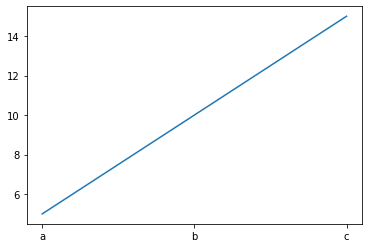

In [ ]:
# 라인 그래프를 그릴 때는 plot( )을 이용해서 그린다.

plt.plot(sr)

In [ ]:
# 바 그래프 그리기

sr1 = Series([1,2,4,8,16], index = ['a','b','c','d','e'])
sr1

a     1
b     2
c     4
d     8
e    16
dtype: int64

<BarContainer object of 5 artists>

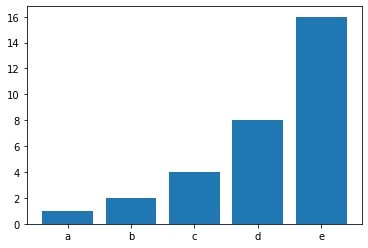

In [ ]:
# 바 그래프는 bar( )를 이용해서 그릴 수 있다.
# bar( )의 경우 x값과 height값을 인자로 넣어주어야 한다.

plt.bar(sr1.index, sr1.values)

### 하나의 figure 안에 두 개의 그래프 그리기
- plt.subplots( ) 함수는 새로운 figure와 axes(subplots)을 생성해준다.

<BarContainer object of 5 artists>

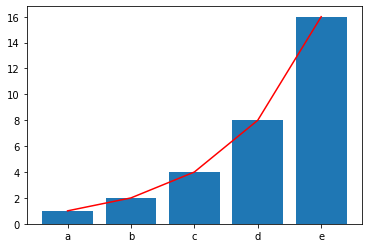

In [ ]:
fig, axes = plt.subplots()
axes.plot(sr1, color = 'r')
axes.bar(sr1.index, sr1.values)

In [ ]:
# 두 개의 그래프를 서로 다른 y축 적용하기

sr2 = Series([500, 300, 250, 180, 700], index = ['a', 'b', 'c', 'd', 'e'])
sr2

a    500
b    300
c    250
d    180
e    700
dtype: int64

<BarContainer object of 5 artists>

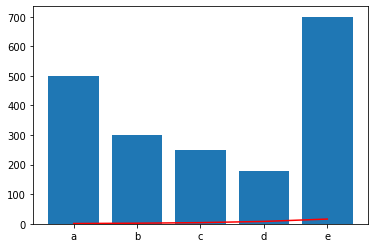

In [ ]:
fig, axes = plt.subplots()
axes.plot(sr1, color = 'r')
axes.bar(sr2.index, sr2.values)

- 두 데이터의 y축 값의 차이가 커서 시각화를 통해 직관적으로 정보를 얻기 어려움
- 이런 경우 2개의 y축을 각각 적용해주어야 함
- 왼쪽의 경우 라인 그래프, 오른쪽의 경우 바 그래프의 y축으로 사용함

<BarContainer object of 5 artists>

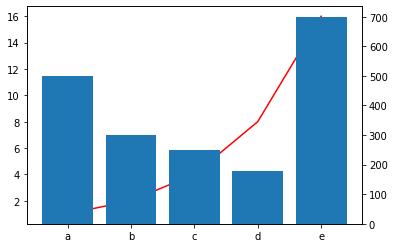

In [ ]:
# ax.twinx( )를 통해서 y축을 같이 적용할 수 있다.

fig, axes = plt.subplots()
axes.plot(sr1, color = 'r')
axes2  = axes.twinx()
axes2.bar(sr2.index, sr2.values)

<BarContainer object of 5 artists>

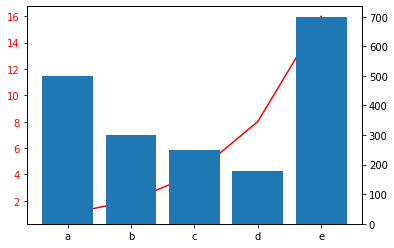

In [ ]:
# tick_params( )를 통해서 y축에 색 변화를 줄 수 있다.

fig, axes = plt.subplots()
axes.plot(sr1, color = 'r')
axes.tick_params(axis = 'y', labelcolor = 'r')
axes2  = axes.twinx()
axes2.bar(sr2.index, sr2.values)

<BarContainer object of 5 artists>

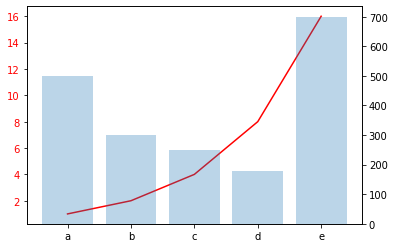

In [ ]:
# 바 그래프에 alpha 값으로 투명도를 조절해줄 수 있다.(0~1 사이의 값)

fig, axes = plt.subplots()
axes.plot(sr1, color = 'r')
axes.tick_params(axis = 'y', labelcolor = 'r')
axes2  = axes.twinx()
axes2.bar(sr2.index, sr2.values, alpha = 0.3)

### 여러 개 그래프 그리기

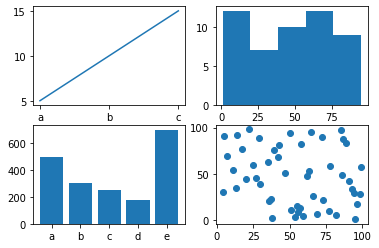

In [ ]:
# subplots( )의 인자값으로 몇 개의 그래프를 생성할지 지정할 수 있다.
# 좌상단부터 (0, 0), (0, 1), (1, 0), (1, 1)이 좌표가 된다.
import random

fig, ax1 = plt.subplots(2,2)
ax1[0,0].plot(sr)
ax1[0,1].hist(random.sample(range(1,100), 50), bins = 5) # bins는 몇 개의 그룹으로 나눌지 결정할 수 있다.
ax1[1,0].bar(sr2.index, sr2.values)
ax1[1,1].scatter(random.sample(range(1,100), 50), random.sample(range(1,100), 50)) # scatter는 x와 y값 2개를 인자로 주어야 한다.

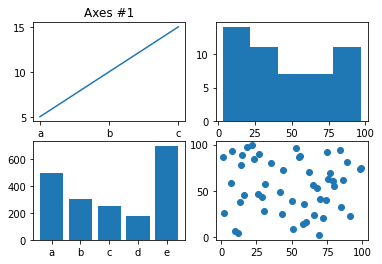

In [ ]:
fig, ax1 = plt.subplots(2,2)
ax1[0,0].plot(sr)
ax1[0,0].set_title('Axes #1') # set_title을 통해서 제목을 지정할 수 있다.
ax1[0,1].hist(random.sample(range(1,100), 50), bins = 5) 
ax1[1,0].bar(sr2.index, sr2.values)
ax1[1,1].scatter(random.sample(range(1,100), 50), random.sample(range(1,100), 50)) 

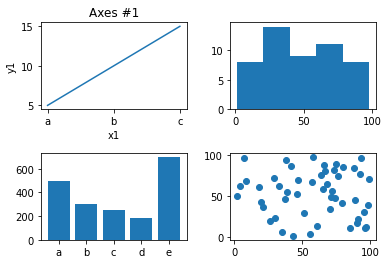

In [ ]:
fig, ax1 = plt.subplots(2,2)
ax1[0,0].plot(sr)
ax1[0,0].set_title('Axes #1')
ax1[0,0].set_xlabel('x1') # set_xlabel을 통해서 xlabel의 이름을 지정할 수 있다.
ax1[0,0].set_ylabel('y1')
ax1[0,1].hist(random.sample(range(1,100), 50), bins = 5) 
ax1[1,0].bar(sr2.index, sr2.values)
ax1[1,1].scatter(random.sample(range(1,100), 50), random.sample(range(1,100), 50)) 

plt.subplots_adjust(hspace = 0.5, wspace = 0.3) # subplots_adjust를 통해서 각 그래프간의 여백을 설정해 줄 수 있다.